In [1]:
# Dependencies and Setup
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats
import scipy.stats as sts


Alicia's analysis 


* Real Estate Price from 2015 to 2020.
* Explore the most expensive housing price, breaking down into city and state.
* Graphing the avg housing price between year 2015 and 2020
* Shows relationship between homeless population and avg housing price



In [2]:
# Extracting the path
real_estate_path = "../Data/Zillow_AllHomes_5yrs_Clean.csv"

In [3]:
# Read Real Estate Data from Zillow (from year 2015 to 2020)
# real_estate_data = pd.read_csv(real_estate_path)
real_estate_data = pd.read_csv(real_estate_path)
real_estate_data = real_estate_data.loc[(real_estate_data["SizeRank"]<50)]
real_estate_data

# original dataframe has 914 rows × 75 columns

,RegionName,StateName,SizeRank,RegionID,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,...,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020
0,United States,Country,0,102001,190722.0,191467.0,192335.0,193235.0,194147.0,194958.0,...,248440,249439,250595,251849,253057,254320,255845,257804,260091,262604
1,"New York, NY",NY,1,394913,408905.0,410065.0,410802.0,411779.0,412581.0,413688.0,...,483191,484139,485177,486507,488000,489895,492468,495908,500412,505569
2,"Los Angeles-Long Beach-Anaheim, CA",CA,2,753899,526530.0,530547.0,534737.0,537106.0,539643.0,542210.0,...,680279,685435,690691,695044,696786,698190,702883,710534,718779,726379
3,"Chicago, IL",IL,3,394463,206017.0,206142.0,206800.0,207924.0,208932.0,209143.0,...,244738,245092,245678,246204,246794,247545,248846,250588,252917,255532
4,"Dallas-Fort Worth, TX",TX,4,394514,177328.0,178799.0,180484.0,182120.0,183830.0,185516.0,...,258147,258784,259781,260955,262153,263579,265256,267187,269202,271831
5,"Philadelphia, PA",PA,5,394974,214903.0,215102.0,215486.0,216077.0,216419.0,216493.0,...,252346,253257,253988,255191,256536,258494,260592,263245,266235,269695
6,"Houston, TX",TX,6,394692,181108.0,182352.0,183775.0,185218.0,186591.0,187660.0,...,221157,221584,222316,223317,224164,224876,225676,226667,228130,229613
7,"Washington, DC",DC,7,395209,378215.0,378695.0,379453.0,379899.0,380143.0,380423.0,...,435581,436644,438080,440133,442240,444715,447972,451650,455719,459656
8,"Miami-Fort Lauderdale, FL",FL,8,394856,223142.0,224872.0,226193.0,227788.0,229038.0,230508.0,...,298110,299741,301051,302382,303555,304793,306059,307858,310191,312574
9,"Atlanta, GA",GA,9,394347,170728.0,171496.0,172166.0,172961.0,174002.0,175232.0,...,240738,241954,243136,244361,245541,247073,248752,250654,252721,255109


In [4]:
# pd.read_csv(real_estate_path)["SizeRank"].value_counts(ascending=True)

In [5]:
# Creating a list 
real_estate_date = []
column_names = ["RegionName", "StateName", "SizeRank", "RegionID"]
for x in real_estate_data.columns:
    if x not in column_names:
        real_estate_date.append(x)

In [6]:
real_estate_df = []
for i, row in real_estate_data.iterrows():
    region_name = row["RegionName"]
    state_name = row["StateName"]
    size_rank = row["SizeRank"]
    region_id = row["RegionID"]
    for x in real_estate_date:
        dat = x.split("/")
        a ={
            "Region Name": region_name,
            "State Name": state_name,
            "Size Rank": size_rank,
            "Region ID": region_id,
            "Date": f"{dat[0].rjust(2, '0')}-{dat[1].rjust(2, '0')}-{dat[2]}",
            "Year": dat[2],
            "Month": dat[0],
            "Housing Price":row[x]
        }
        real_estate_df.append(a)
        


In [7]:
# creating the new dataframe for easy viewing 
new_RE_df = pd.DataFrame(real_estate_df)
new_RE_df.head()

,Region Name,State Name,Size Rank,Region ID,Date,Year,Month,Housing Price
0,United States,Country,0,102001,01-31-2015,2015,1,190722.0
1,United States,Country,0,102001,02-28-2015,2015,2,191467.0
2,United States,Country,0,102001,03-31-2015,2015,3,192335.0
3,United States,Country,0,102001,04-30-2015,2015,4,193235.0
4,United States,Country,0,102001,05-31-2015,2015,5,194147.0


In [8]:
# drop NA from the dataframe
new_RE_df = new_RE_df.dropna(how="any")
# new_RE_df.head()


In [9]:
# Drop duplicate 
no_duplicate_RE_df = new_RE_df.drop_duplicates()
# no_duplicate_RE_df.head()

In [10]:
# split city from state, make a new column with just city

no_duplicate_RE_df["Region Name"] = no_duplicate_RE_df["Region Name"].str.split(",").str[0]
# no_duplicate_RE_df.head()


In [11]:
# rename the Region Name to City Name
no_duplicate_RE_df = no_duplicate_RE_df.rename({"Region Name": "City Name"}, axis="columns")
# no_duplicate_RE_df.head()


In [12]:
# mean, max, min
RE_groupby_year = no_duplicate_RE_df.groupby("Year").describe()["Housing Price"]
RE_groupby_year


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,600.0,249230.176667,155032.759397,116262.0,152894.00,200675.0,268658.75,898866.0
2016,600.0,264500.050000,166512.023699,120997.0,162226.50,212571.0,289200.50,937493.0
2017,600.0,282254.931667,179291.285264,125727.0,174201.50,226133.5,305470.75,1097507.0
2018,600.0,304151.101667,205977.873919,134882.0,188084.75,236797.0,317238.50,1239591.0
2019,600.0,311686.565000,196799.821514,145686.0,199598.00,245570.5,332084.25,1151808.0
2020,500.0,325583.432000,204793.603460,155661.0,207728.50,255595.5,346665.00,1236298.0


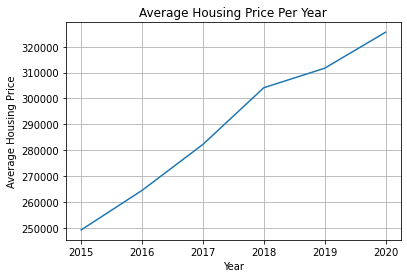

In [13]:
#create a line chart of the mean of the housing mean
# x-axis = RE_groupby_year.index.values, y-axis = RE_groupby_year["mean"] 
# the index values are the years, 2015, 2016 , etc. 
plt.plot(RE_groupby_year.index.values, RE_groupby_year["mean"])

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Average Housing Price")
plt.title("Average Housing Price Per Year")

# plt.xlim(-0.75, len(RE_groupby_year.index.values))
# plt.ylim(145000, max(RE_groupby_year["mean"])+50)

plt.grid()
plt.show()

# positive relationship
# increasing housing price from 2015 to 2020
# add x-lim and y- lim


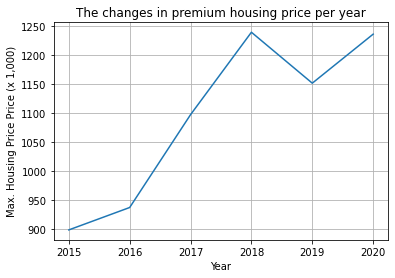

In [14]:
# looking at relationship of how much the max. housing price changes over the past 5 years

plt.plot(RE_groupby_year.index.values, RE_groupby_year["max"]/1000)

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Max. Housing Price Price (x 1,000)")
plt.title("The changes in premium housing price per year")


plt.grid()
plt.show()


In [15]:
# RE_groupby_year["max"]/10000

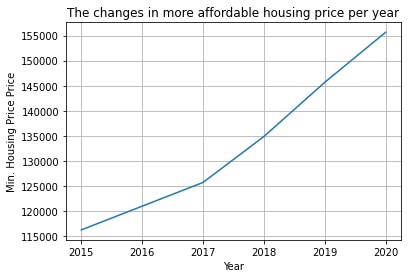

In [16]:
# looking at relationship of how much the min. housing price changes over the past 5 years

plt.plot(RE_groupby_year.index.values, RE_groupby_year["min"])

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Min. Housing Price Price")
plt.title("The changes in more affordable housing price per year")


plt.grid()
plt.show()



In [17]:
# grouping the housing price by state
RE_groupby_state = no_duplicate_RE_df.groupby(["State Name", "Year"]).describe()["Housing Price"]
RE_groupby_state.head()

count           mean          std       min        25%  \
State Name Year                                                           
AL         2015   12.0  141037.833333  1149.274382  139393.0  140196.25   
           2016   12.0  145023.250000  1524.761628  142635.0  144172.50   
           2017   12.0  150729.750000  1586.866903  148599.0  149447.75   
           2018   12.0  157994.750000  2748.011417  153865.0  155679.50   
           2019   12.0  166650.416667  3120.572717  162361.0  163966.00   

                      50%        75%       max  
State Name Year                                 
AL         2015  140822.0  142290.25  142528.0  
           2016  145060.5  145472.25  147975.0  
           2017  150505.5  152168.75  153188.0  
           2018  158075.0  160315.25  161841.0  
           2019  166576.0  169150.75  171450.0

In [18]:
# looking at the median housing price
RE_groupby_state_median = RE_groupby_state["50%"]
RE_groupby_state_median.head()


State Name  Year
AL          2015    140822.0
            2016    145060.5
            2017    150505.5
            2018    158075.0
            2019    166576.0
Name: 50%, dtype: float64

In [19]:
state_year_min_max = no_duplicate_RE_df.groupby(["State Name", "Year", "City Name"])["Housing Price"].agg(["min", "max"])
state_year_min_max
# state_year_median = no_duplicate_RE_df.groupby(["State Name", "Year", "City Name"])["Housing Price"].median()
# state_year_median




min       max
State Name Year City Name                     
AL         2015 Birmingham  139393.0  142528.0
           2016 Birmingham  142635.0  147975.0
           2017 Birmingham  148599.0  153188.0
           2018 Birmingham  153865.0  161841.0
           2019 Birmingham  162361.0  171450.0
...                              ...       ...
WI         2016 Milwaukee   151726.0  159482.0
           2017 Milwaukee   160212.0  167940.0
           2018 Milwaukee   169370.0  178285.0
           2019 Milwaukee   178439.0  186876.0
           2020 Milwaukee   187973.0  202012.0

[300 rows x 2 columns]

In [20]:
state_year_min_max_2 = state_year_min_max.reset_index()
state_year_min_max_2.sort_values(["State Name", "max"], inplace=True)
state_year_min_max_2.groupby(["State Name", "Year"]).last()

City Name       min       max
State Name Year                                
AL         2015  Birmingham  139393.0  142528.0
           2016  Birmingham  142635.0  147975.0
           2017  Birmingham  148599.0  153188.0
           2018  Birmingham  153865.0  161841.0
           2019  Birmingham  162361.0  171450.0
...                     ...       ...       ...
WI         2016   Milwaukee  151726.0  159482.0
           2017   Milwaukee  160212.0  167940.0
           2018   Milwaukee  169370.0  178285.0
           2019   Milwaukee  178439.0  186876.0
           2020   Milwaukee  187973.0  202012.0

[186 rows x 3 columns]

In [21]:
state_year_min_max2 = state_year_min_max.copy().reset_index()
ls = {}
for i, row in state_year_min_max2.iterrows():
    if row["State Name"] not in ls:
        ls[row["State Name"]] = [10000000000, 0, "", "", 0, 0]
    if ls[row["State Name"]][0]>row["min"]:
        ls[row["State Name"]][0] =row["min"]
        ls[row["State Name"]][2] = row["City Name"]
        ls[row["State Name"]][4] = row["Year"]
    if ls[row["State Name"]][1]<row["max"]:
        ls[row["State Name"]][1] =row["max"]
        ls[row["State Name"]][3] = row["City Name"]
        ls[row["State Name"]][5] = row["Year"]
    a= 1
print(row)
# print(ls)
max_min_state_year = pd.DataFrame(ls).T
max_min_state_year.head()

State Name           WI
Year               2020
City Name     Milwaukee
min              187973
max              202012
Name: 299, dtype: object


,0,1,2,3,4,5
AL,139393,184012,Birmingham,Birmingham,2015,2020
AZ,202761,315045,Phoenix,Phoenix,2015,2020
CA,291739,1.23959e+06,Riverside,San Jose,2015,2018
CO,304796,468128,Denver,Denver,2015,2020
CT,219932,250566,Hartford,Hartford,2015,2020


In [22]:
max_min_state_year = max_min_state_year.rename(columns={
        0: "Min. Housing Price",
        1: "Max. Housing Price",
        2: "City of Min. Housing Price",
        3: "City of Max. Housing Price",
        4: "Year of Min. Housing Price",
        5: "Year of Max. Housing Price"})

max_min_state_year.head()

,Min. Housing Price,Max. Housing Price,City of Min. Housing Price,City of Max. Housing Price,Year of Min. Housing Price,Year of Max. Housing Price
AL,139393,184012,Birmingham,Birmingham,2015,2020
AZ,202761,315045,Phoenix,Phoenix,2015,2020
CA,291739,1.23959e+06,Riverside,San Jose,2015,2018
CO,304796,468128,Denver,Denver,2015,2020
CT,219932,250566,Hartford,Hartford,2015,2020


In [23]:
max_min_state_year1 = max_min_state_year[max_min_state_year.index !="Country"]
max_min_state_year1.head()

,Min. Housing Price,Max. Housing Price,City of Min. Housing Price,City of Max. Housing Price,Year of Min. Housing Price,Year of Max. Housing Price
AL,139393,184012,Birmingham,Birmingham,2015,2020
AZ,202761,315045,Phoenix,Phoenix,2015,2020
CA,291739,1.23959e+06,Riverside,San Jose,2015,2018
CO,304796,468128,Denver,Denver,2015,2020
CT,219932,250566,Hartford,Hartford,2015,2020


In [24]:
len(max_min_state_year1.index)

30

Text(0, 0.5, 'Housing Price (Million $)')

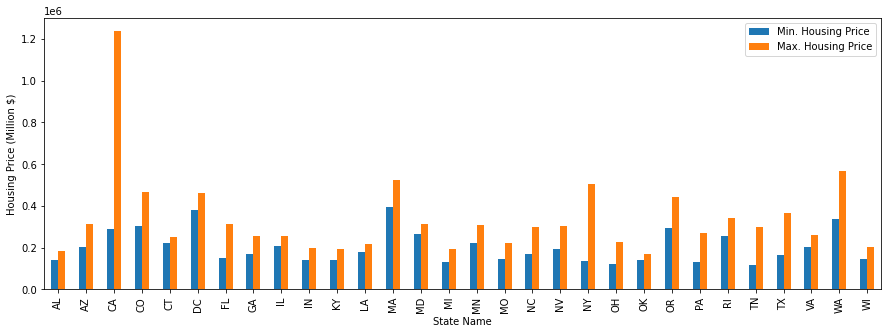

In [25]:
max_housing_price_bar = max_min_state_year1.plot(kind="bar", figsize=(15,5))

plt.xlabel("State Name")
plt.ylabel("Housing Price (Million $)")


In [26]:
state_year_median = no_duplicate_RE_df.groupby("State Name")["Housing Price"].median()
state_year_median = state_year_median[state_year_median.index != "Country"]
state_year_median.head()

State Name
AL    152861.5
AZ    247734.0
CA    585473.0
CO    405354.0
CT    231056.5
Name: Housing Price, dtype: float64

Text(0, 0.5, 'Housing Price')

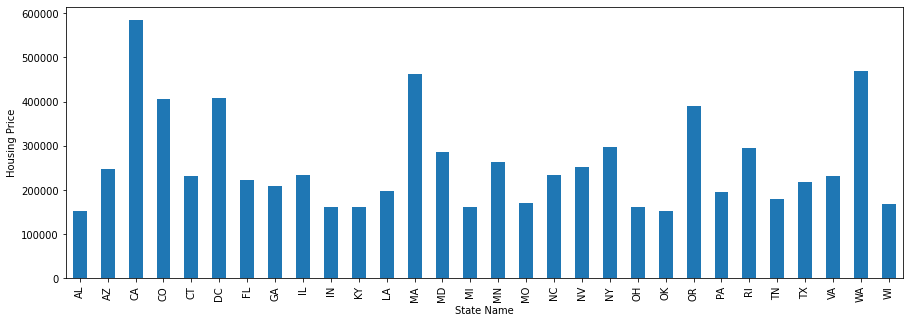

In [27]:
state_year_median_bar = state_year_median.plot(kind="bar", figsize=(15,5))

plt.xlabel("State Name")
plt.ylabel("Housing Price")


In [28]:
homelessdata = "../Data/PIT_AllYearsData_Output.csv"
homeless_df = pd.read_csv(homelessdata)
homeless_df.head()

,Year,State,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered Total Homeless Individuals,Unsheltered Homeless Individuals,Overall Homeless People in Families,Sheltered Total Homeless People in Families,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families,Overall Homeless Veterans,Sheltered Total Homeless Veterans,Unsheltered Homeless Veterans
0,2019,AK,1907.0,1634,273,1384,1118,266,523,516,...,99,231,134,97,38,36,2,111,85,26
1,2019,AL,3261.0,2070,1191,2519,1429,1090,742,641,...,139,350,221,129,19,9,10,292,223,69
2,2019,AR,2717.0,1302,1415,2303,972,1331,414,330,...,453,676,223,453,15,15,0,238,153,85
3,2019,AZ,10007.0,5475,4532,7538,3099,4439,2469,2376,...,1210,1766,599,1167,110,67,43,910,598,312
4,2019,CA,151278.0,42846,108432,128777,25323,103454,22501,17523,...,33670,39275,6483,32792,2282,1404,878,10980,3261,7719


In [29]:
#group homeless by state
homeless_df_state = homeless_df.groupby("State").mean()
homeless_df_state.head()

,Year,Overall Homeless
State,,
AK,2017,1932.8
AL,2017,3713.8
AR,2017,2583.8
AZ,2017,9684.4
CA,2017,129332.4


In [30]:
# len(homeless_df_state)

# drop PR, VI, GUI, MP, Total 
# RE_no_country_df.head()


In [31]:
RE_groupby_state1 = no_duplicate_RE_df.groupby("State Name").describe()["Housing Price"]
RE_groupby_state1.head()

,count,mean,std,min,25%,50%,75%,max
State Name,,,,,,,,
AL,70.0,155941.628571,12647.825806,139393.0,145055.75,152861.5,164418.50,184012.0
AZ,70.0,250125.157143,29501.454051,202761.0,225481.75,247734.0,270633.00,315045.0
CA,420.0,656780.485714,281018.948460,291739.0,399352.25,585473.0,909470.50,1239591.0
CO,70.0,397450.028571,45538.487246,304796.0,361325.75,405354.0,436518.75,468128.0
CT,70.0,229969.528571,7251.453283,219932.0,222403.25,231056.5,234711.25,250566.0


In [32]:
# There's a country data in the dataframe, so I drop that from my dataframe.
RE_no_country_df1 = RE_groupby_state1[RE_groupby_state1.index !="Country"]
RE_no_country_df1


,count,mean,std,min,25%,50%,75%,max
State Name,,,,,,,,
AL,70.0,155941.628571,12647.825806,139393.0,145055.75,152861.5,164418.50,184012.0
AZ,70.0,250125.157143,29501.454051,202761.0,225481.75,247734.0,270633.00,315045.0
CA,420.0,656780.485714,281018.948460,291739.0,399352.25,585473.0,909470.50,1239591.0
CO,70.0,397450.028571,45538.487246,304796.0,361325.75,405354.0,436518.75,468128.0
CT,70.0,229969.528571,7251.453283,219932.0,222403.25,231056.5,234711.25,250566.0
DC,70.0,409039.657143,22620.751574,378215.0,387545.50,408137.5,427299.00,459656.0
FL,280.0,224860.925000,38415.957220,152008.0,194235.00,223101.5,249232.50,312574.0
GA,70.0,210369.942857,25507.113422,170728.0,187745.50,209401.5,234088.50,255109.0
IL,70.0,230801.957143,14601.238764,206017.0,216816.50,234070.5,244345.00,255532.0


In [33]:

# RE_no_country_df.reset_index(level='Year', col_level=1, col_fill='State Name')


In [34]:
# RE_no_country_df = RE_no_country_df.rename({"State Name": "State"}, axis="columns")
# RE_no_country_df


In [35]:
# RE_no_country_df.columns

In [36]:
# merging two dataframe together, Real State without Country, and Homeless dataframe
joined_RE_HL = pd.merge(RE_no_country_df1, homeless_df_state, how='inner', left_index=True, right_index=True)
joined_RE_HL.head()


,count,mean,std,min,25%,50%,75%,max,Year,Overall Homeless
AL,70.0,155941.628571,12647.825806,139393.0,145055.75,152861.5,164418.50,184012.0,2017,3713.8
AZ,70.0,250125.157143,29501.454051,202761.0,225481.75,247734.0,270633.00,315045.0,2017,9684.4
CA,420.0,656780.485714,281018.948460,291739.0,399352.25,585473.0,909470.50,1239591.0,2017,129332.4
CO,70.0,397450.028571,45538.487246,304796.0,361325.75,405354.0,436518.75,468128.0,2017,10383.8
CT,70.0,229969.528571,7251.453283,219932.0,222403.25,231056.5,234711.25,250566.0,2017,3669.2


(0.6332034642260985, 0.00017294323461548)
The correlation between average housing price and homeless population is 0.63


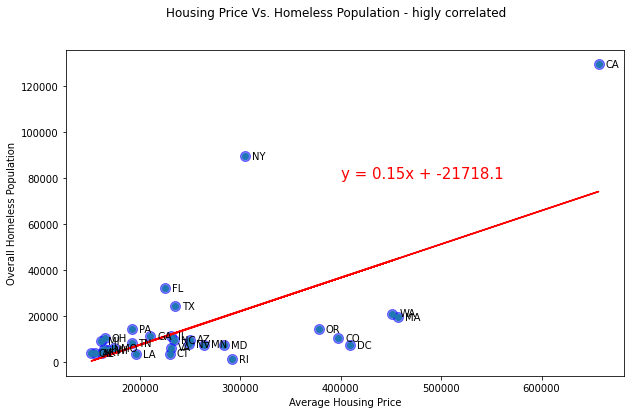

In [64]:
# creating a scatter plot
x = joined_RE_HL["mean"]
y = joined_RE_HL["Overall Homeless"]

# finding the correlation 
correlation = sts.pearsonr(x, y)
print(correlation)

print(f"The correlation between average housing price and homeless population is {round(correlation[0],2)}")


labels = joined_RE_HL.index

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Housing Price Vs. Homeless Population - higly correlated')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Average Housing Price')
plt.ylabel('Overall Homeless Population')
plt.scatter(x, y)
plt.annotate(line_eq,(400000,80000),fontsize=15,color="red")
plt.plot(x,regress_values,"r-")

# Show the plot
plt.show()

In [38]:
# using the homeless dataframe, remove NY and CA 
homeless_no_NY = homeless_df_state[homeless_df_state.index !="NY"]
# homeless_no_NY.head()

In [39]:
homeless_no_CA_NY = homeless_no_NY[homeless_no_NY.index !="CA"]
# # homeless_no_CA_NY.head()

In [40]:
RE_no_CA = RE_no_country_df1[RE_no_country_df1.index !="CA"]
# # RE_no_CA.head()


In [41]:
RE_no_CA_NY = RE_no_CA[RE_no_CA.index !="NY"]
# # RE_no_CA_NY.head()

In [42]:
joined_no_NY_CA = pd.merge(RE_no_CA_NY, homeless_no_CA_NY, how='inner', left_index= True, right_index=True)
# joined_no_NY_CA



(0.35910029657461634, 0.06055993607155463)
The correlation between average housing price and homeless population is 0.36
(0.35910029657461634, 0.06055993607155463)


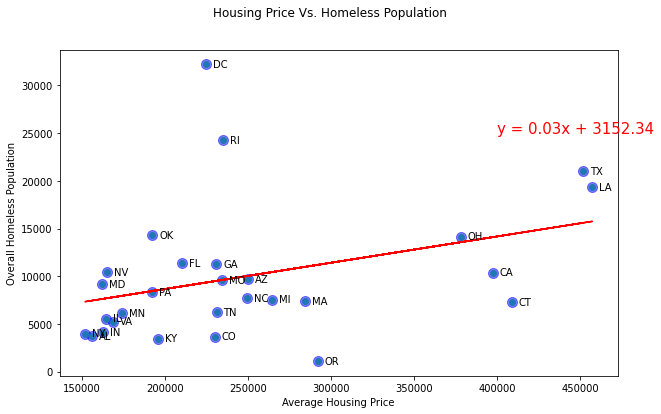

In [43]:
# creating a scatter plot
x = joined_no_NY_CA["mean"]
y = joined_no_NY_CA["Overall Homeless"]

# finding the correlation 
correlation = sts.pearsonr(x, y)
print(correlation)

print(f"The correlation between average housing price and homeless population is {round(correlation[0],2)}")

# finding the correlation 
correlation = sts.pearsonr(x, y)
print(correlation)

labels = joined_RE_HL.index

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Housing Price Vs. Homeless Population')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Average Housing Price')
plt.ylabel('Overall Homeless Population')
plt.scatter(x, y)
plt.annotate(line_eq,(400000,25000),fontsize=15,color="red")
plt.plot(x,regress_values,"r-")

# Show the plot
plt.show()

In [44]:
# Extracting the path
state_population = "../Data/State_Names_Sheet3.csv"

In [45]:
# Read Real Estate Data from Zillow (from year 2015 to 2020)
state_population1 = pd.read_csv(state_population).set_index('State')
state_population1.head()

,Population
State,
AL,4888949
AK,738068
AZ,7123898
AR,3020327
CA,39776830


In [46]:
# homeless_df_state

In [47]:
joined_population_homeless = pd.merge(state_population1, homeless_df_state, how='inner', left_index=True, right_index=True)
joined_population_homeless.head()

,Population,Year,Overall Homeless
State,,,
AL,4888949,2017,3713.8
AK,738068,2017,1932.8
AZ,7123898,2017,9684.4
AR,3020327,2017,2583.8
CA,39776830,2017,129332.4


In [48]:
#2017/x100
joined_population_homeless["Homelessness_rate"] = joined_population_homeless["Overall Homeless"]/joined_population_homeless["Population "]*100
# joined_population_homeless["Homelessness_rate"]



In [49]:
joined_2 = pd.merge(RE_no_country_df1, joined_population_homeless, how='inner', left_index=True, right_index=True)
joined_2.head()


,count,mean,std,min,25%,50%,75%,max,Population,Year,Overall Homeless,Homelessness_rate
AL,70.0,155941.628571,12647.825806,139393.0,145055.75,152861.5,164418.50,184012.0,4888949,2017,3713.8,0.075963
AZ,70.0,250125.157143,29501.454051,202761.0,225481.75,247734.0,270633.00,315045.0,7123898,2017,9684.4,0.135942
CA,420.0,656780.485714,281018.948460,291739.0,399352.25,585473.0,909470.50,1239591.0,39776830,2017,129332.4,0.325145
CO,70.0,397450.028571,45538.487246,304796.0,361325.75,405354.0,436518.75,468128.0,5684203,2017,10383.8,0.182678
CT,70.0,229969.528571,7251.453283,219932.0,222403.25,231056.5,234711.25,250566.0,3588683,2017,3669.2,0.102244


(0.5596968514787194, 0.0013003099988970486)
The correlation between average housing price and homeless rate is 0.56


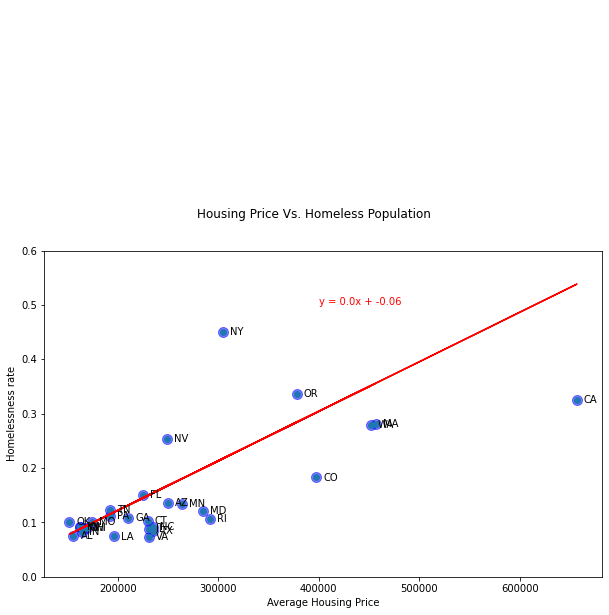

In [50]:
# plot homelessness vs. avg pricing 

# creating a scatter plot
x = joined_2["mean"]
y = joined_2["Homelessness_rate"]

# finding the correlation 
correlation = sts.pearsonr(x, y)
print(correlation)

print(f"The correlation between average housing price and homeless rate is {round(correlation[0],2)}")


labels = joined_2.index

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Housing Price Vs. Homeless Population')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Average Housing Price')
plt.ylabel('Homelessness rate')
plt.ylim(0, 0.6)
plt.scatter(x, y)
plt.annotate(line_eq,(400000,0.5),fontsize=10,color="red")
plt.plot(x,regress_values,"r-")

# Show the plot
plt.show()

In [51]:

# DC is just a City
# state above the line, usually states are really cold. 
# NY - manhanthan 

# homeless population per unit 
# E.g. more housing in Per 1,000 house, how many homeless people we have
# NY has more population - more homeless population
# groupby on housing price, and do count devided by homeless population 


In [52]:
# average homeless number for each year
homeless_df1 = homeless_df.groupby("Year").sum()
homeless_df1

,Overall Homeless
Year,
2015,1129416.0
2016,1099856.0
2017,1101992.0
2018,1105660.0
2019,1135430.0


In [53]:
homeless_df2 = homeless_df.pivot(index='State', columns='Year', values='Overall Homeless')
homeless_df2.head()

Year,2015,2016,2017,2018,2019
State,,,,,
AK,1956.0,1940.0,1845.0,2016.0,1907.0
AL,3970.0,4111.0,3793.0,3434.0,3261.0
AR,2560.0,2463.0,2467.0,2712.0,2717.0
AZ,9896.0,9707.0,8947.0,9865.0,10007.0
CA,115738.0,118142.0,131532.0,129972.0,151278.0


In [54]:
homeless_df3 = pd.DataFrame(homeless_df2.iloc[:,0])
homeless_df3['2019'] = homeless_df2.iloc[:,4]
homeless_df3.head()

,2015,2019
State,,
AK,1956.0,1907.0
AL,3970.0,3261.0
AR,2560.0,2717.0
AZ,9896.0,10007.0
CA,115738.0,151278.0


In [55]:
RE_groupby_year = no_duplicate_RE_df.groupby("Year").describe()["Housing Price"]
RE_groupby_year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,600.0,249230.176667,155032.759397,116262.0,152894.00,200675.0,268658.75,898866.0
2016,600.0,264500.050000,166512.023699,120997.0,162226.50,212571.0,289200.50,937493.0
2017,600.0,282254.931667,179291.285264,125727.0,174201.50,226133.5,305470.75,1097507.0
2018,600.0,304151.101667,205977.873919,134882.0,188084.75,236797.0,317238.50,1239591.0
2019,600.0,311686.565000,196799.821514,145686.0,199598.00,245570.5,332084.25,1151808.0
2020,500.0,325583.432000,204793.603460,155661.0,207728.50,255595.5,346665.00,1236298.0


In [56]:
RE_groupby_state = no_duplicate_RE_df.groupby("State Name").describe()["Housing Price"]
RE_groupby_state.head()


,count,mean,std,min,25%,50%,75%,max
State Name,,,,,,,,
AL,70.0,155941.628571,12647.825806,139393.0,145055.75,152861.5,164418.50,184012.0
AZ,70.0,250125.157143,29501.454051,202761.0,225481.75,247734.0,270633.00,315045.0
CA,420.0,656780.485714,281018.948460,291739.0,399352.25,585473.0,909470.50,1239591.0
CO,70.0,397450.028571,45538.487246,304796.0,361325.75,405354.0,436518.75,468128.0
CT,70.0,229969.528571,7251.453283,219932.0,222403.25,231056.5,234711.25,250566.0


In [57]:
# drop off the data that has country 
RE_no_country_df = RE_groupby_state[RE_groupby_state.index !="Country"]
RE_no_country_df.head()


,count,mean,std,min,25%,50%,75%,max
State Name,,,,,,,,
AL,70.0,155941.628571,12647.825806,139393.0,145055.75,152861.5,164418.50,184012.0
AZ,70.0,250125.157143,29501.454051,202761.0,225481.75,247734.0,270633.00,315045.0
CA,420.0,656780.485714,281018.948460,291739.0,399352.25,585473.0,909470.50,1239591.0
CO,70.0,397450.028571,45538.487246,304796.0,361325.75,405354.0,436518.75,468128.0
CT,70.0,229969.528571,7251.453283,219932.0,222403.25,231056.5,234711.25,250566.0


In [58]:
# mean price of the city based on state
# RE_groupby_city = no_duplicate_RE_df.groupby(["State Name", "City Name"]).mean()["Housing Price"]
# RE_groupby_city

# RE_groupby_city2 = no_duplicate_RE_df.groupby(["State Name", "City Name"]).median()["Housing Price"]
# RE_groupby_city2


In [59]:
# # reset_index(), switch the year as index from previously to become a column again
# RE_groupby_city = RE_groupby_city.reset_index()
# RE_groupby_city

# # sorting the value of the city based on housing price

# RE_groupby_city = RE_groupby_city.sort_values("Housing Price")

# # Cheapest house
# # we are using the first value of each state based on the lowest price of the house
# RE_groupby_city_cheap = RE_groupby_city.groupby("State Name").first()
# RE_groupby_city_cheap.head()

In [60]:
# round(RE_groupby_city.loc[912, "Housing Price"], 2)

In [61]:
# RE_groupby_city["Housing Price"] = [round(x, 2) for x in RE_groupby_city["Housing Price"]]
# RE_groupby_city.tail()

In [62]:
# # Most expensive house 
# # extract the most expensive price of the house based on states
# RE_groupby_city_max = RE_groupby_city.groupby("State Name").last()
# RE_groupby_city_max["Housing Price"] = [round(x, 2) for x in RE_groupby_city_max["Housing Price"]]

# # RE_groupby_city_max.head()


# # expand the width of the column 
# # RE_groupby_city_max = RE_groupby_city_max.style.set_properties(subset=['Housing Price'], **{'width-min': '300px'})
# RE_groupby_city_max.plot()

